In [16]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#Гиперпараметры
BATCH_SIZE = 64 # Размер пакета данных для обучения
LEARNING_RATE = 0.001 # Скорость обучения
EPOCHS = 50 # Эпохи

# Загрузка данных
def load_data(batch_size):
    train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
    test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=transforms.ToTensor())
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size)
    return train_loader, test_loader

# Определение модели
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.model(x)

# Функция для обучения модели
def train_epoch(loader, model, criterion, optimizer):
    model.train()
    total_loss = 0
    for X, y in loader:
        preds = model(X)
        loss = criterion(preds, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# Функция для тестирования модели
def test(loader, model, criterion):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in loader:
            preds = model(X)
            loss = criterion(preds, y)
            total_loss += loss.item()
            correct += (preds.argmax(1) == y).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

# Функция для запуска эксперимента с разными оптимизаторами
def experiment(optimizer_cls, epochs, train_loader, test_loader):
    model = SimpleNN()
    optimizer = optimizer_cls(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.CrossEntropyLoss()
    train_losses, test_losses = [], []
    
    for epoch in range(epochs):
        train_loss = train_epoch(train_loader, model, criterion, optimizer)
        test_loss, accuracy = test(test_loader, model, criterion)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print(f"Эпоха {epoch + 1}/{epochs} - Обучение: {train_loss:.4f}, Тест: {test_loss:.4f}, Точность: {accuracy:.2%}")
    
    return train_losses, test_losses

# Запуск эксперимента с различными оптимизаторами
optimizers = {"SGD": optim.SGD, "RMSprop": optim.RMSprop, "Adam": optim.Adam}
train_loader, test_loader = load_data(BATCH_SIZE)
results = {}

for name, opt_cls in optimizers.items():
    print(f"\nНачинаем обучение с оптимизатором {name}")
    train_losses, test_losses = experiment(opt_cls, EPOCHS, train_loader, test_loader)
    results[name] = {"train_losses": train_losses, "test_losses": test_losses}



Начинаем обучение с оптимизатором SGD
Эпоха 1/50 - Обучение: 2.0439, Тест: 1.7926, Точность: 62.68%
Эпоха 2/50 - Обучение: 1.5640, Тест: 1.3769, Точность: 64.51%
Эпоха 3/50 - Обучение: 1.2387, Тест: 1.1393, Точность: 65.98%
Эпоха 4/50 - Обучение: 1.0566, Тест: 1.0046, Точность: 67.27%
Эпоха 5/50 - Обучение: 0.9488, Тест: 0.9209, Точность: 68.84%
Эпоха 6/50 - Обучение: 0.8784, Тест: 0.8635, Точность: 70.37%
Эпоха 7/50 - Обучение: 0.8282, Тест: 0.8216, Точность: 71.35%
Эпоха 8/50 - Обучение: 0.7900, Тест: 0.7878, Точность: 72.35%
Эпоха 9/50 - Обучение: 0.7593, Тест: 0.7610, Точность: 73.36%
Эпоха 10/50 - Обучение: 0.7337, Тест: 0.7380, Точность: 73.93%
Эпоха 11/50 - Обучение: 0.7119, Тест: 0.7177, Точность: 74.93%
Эпоха 12/50 - Обучение: 0.6926, Тест: 0.7002, Точность: 75.46%
Эпоха 13/50 - Обучение: 0.6756, Тест: 0.6855, Точность: 76.34%
Эпоха 14/50 - Обучение: 0.6604, Тест: 0.6709, Точность: 77.04%
Эпоха 15/50 - Обучение: 0.6466, Тест: 0.6578, Точность: 77.37%
Эпоха 16/50 - Обучение: 0

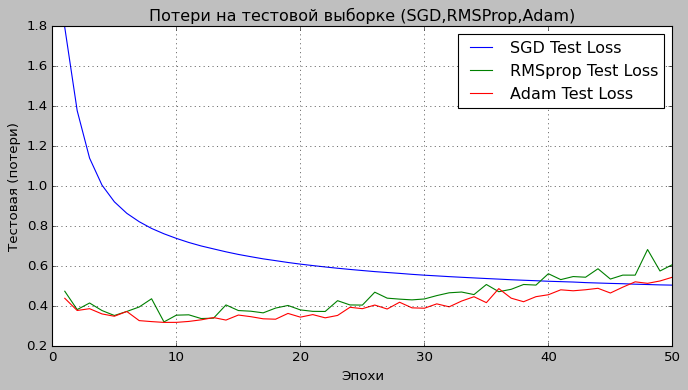

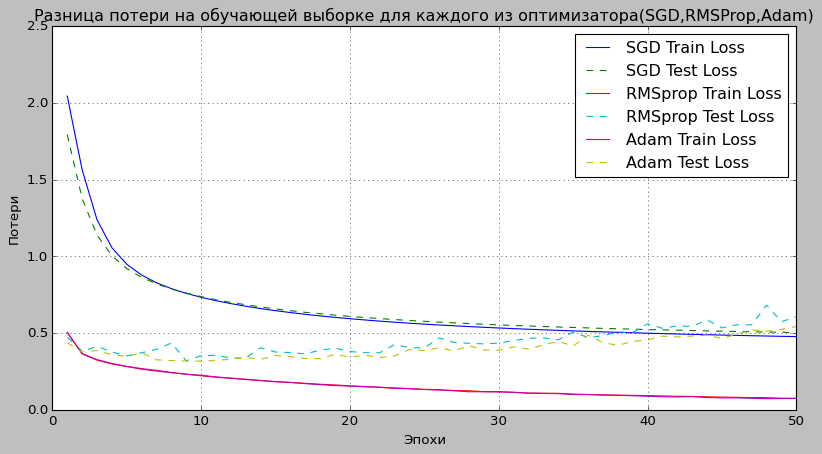

In [19]:
# Построение графиков
plt.figure(figsize=(10, 5))

for opt_name, losses in results.items():
    plt.plot(range(1, EPOCHS + 1), losses["test_losses"], label=f"{opt_name} Test Loss")

plt.xlabel('Эпохи')
plt.ylabel('Тестовая (потери)')
plt.title('Потери на тестовой выборке (SGD,RMSProp,Adam)')
plt.grid(True)
plt.legend()
plt.show()

# Построение графиков
plt.figure(figsize=(12, 6))

for opt_name, losses in results.items():
    plt.plot(range(1, EPOCHS + 1), losses["train_losses"], label=f"{opt_name} Train Loss")
    plt.plot(range(1, EPOCHS + 1), losses["test_losses"], linestyle="--", label=f"{opt_name} Test Loss")

plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.title('Разница потери на обучающей выборке для каждого из оптимизатора(SGD,RMSProp,Adam)')
plt.grid(True)
plt.legend()
plt.show()

На первом графике показано, что оптимизатор SGD демонстрирует высокие начальные потери, которые медленно снижаются, оставаясь выше, чем у других методов, что указывает на медленную сходимость и меньшую стабильность. Оптимизаторы RMSProp и Adam достигают более низких значений потерь при тестировании, при этом Adam достигает самых низких значений и демонстрирует наилучшую производительность. 

Второй график показывает, что потери на тренировочном наборе уменьшаются для всех методов; однако SGD показывает значительный разрыв между потерями на тренировках и тестах, что указывает на потенциальное переобучение или медленную адаптацию. RMSProp демонстрирует более стабильное поведение, но уступает Adam в тестовом наборе. Adam обеспечивает наименьший разрыв между потерями при обучении и тестировании, что подчеркивает его способность эффективно обобщать и избегать переобучения. 

В целом, Adam зарекомендовал себя как наиболее эффективный оптимизатор, обеспечивающий превосходные результаты как по качеству, так и по стабильности. SGD демонстрирует самую слабую производительность, отставая как по скорости сходимости, так и по качеству конечных потерь, в то время как RMSProp занимает промежуточное положение, обеспечивая стабильное обучение, но уступая Adam в точности и обобщении.